In [3]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

pd.set_option("max_columns", None)

In [7]:
data = pd.read_csv('data/final_data.csv')
data = data.rename(columns={'Lat': 'Latitude', 'Long': 'Longitude'})

In [8]:
#selecting columns to avoid overfitting and multi-colinearity

columns = ['Country',
 'Country Code',
 'Latitude',
 'Longitude',
 'COVID-19 Cases',
 'Malaria Cases',
 #'Mean years of schooling 2018',
 'Gross national income (GNI) per capita 2018',
 #'Life Ladder',
 #'Log GDP per capita',
 #'Social support',
 #'Healthy life expectancy at birth',
 #'Freedom to make life choices',
 'Perceptions of corruption',
 'Confidence in national government',
 #'Democratic Quality',
 'GINI index (World Bank estimate)',
 'Air Passengers Carried',
 'Tests Conducted',
 #'Positive Tests',
 #'Positive/Tested %',
 'Hospital Beds/1000',
 #'Occupancy%',
 'Population',
 'Population Density',
 'Migrants',
 #'Fertility Rate',
 'Median Age',
 'Urban Population%',
 #'Quality of Life Index',
 'Safety Index',
 'Health Care Index',
 #'Cost of Living Index',
 #'Pollution Index',
 'Climate Index',
 'Avg Temp',
 'Min Temp',
 'Max Temp',
 'Avg Pressure',
 'Wind Speed',
 'Precipitation',
 'Fog']

data = data[columns]

In [10]:
#checking for multicollinearity

corr_matrix = data.corr().abs()

#extract most correlating factors, remove top half of upper diagnol correlation matrix
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

sol.head(20)

COVID-19 Cases                               Tests Conducted              0.929941
Air Passengers Carried                       Tests Conducted              0.858327
COVID-19 Cases                               Air Passengers Carried       0.810140
Min Temp                                     Max Temp                     0.797266
Gross national income (GNI) per capita 2018  Median Age                   0.652109
Longitude                                    Population                   0.617275
Tests Conducted                              Migrants                     0.596972
Air Passengers Carried                       Population                   0.593885
COVID-19 Cases                               Migrants                     0.588258
Gross national income (GNI) per capita 2018  Perceptions of corruption    0.560971
Median Age                                   Avg Temp                     0.558160
                                             Safety Index                 0.544639
Lati

In [11]:
X, y = data.drop(['Country', 'Country Code','COVID-19 Cases'], axis=1), data.iloc[:, 4]
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [12]:
#divide data and fit model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
xg_reg = xgb.XGBRegressor(n_estimators=1000, objective='reg:squarederror')
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [13]:
#evaluate using RMSE error

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 22213.158735


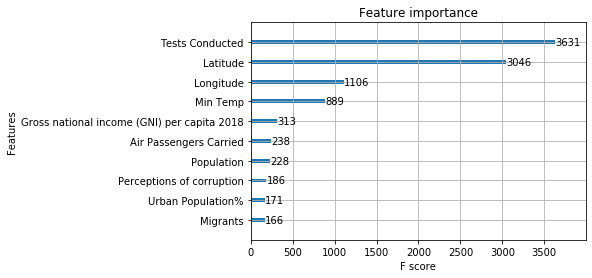

In [14]:
xgb.plot_importance(xg_reg, max_num_features=10)
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()

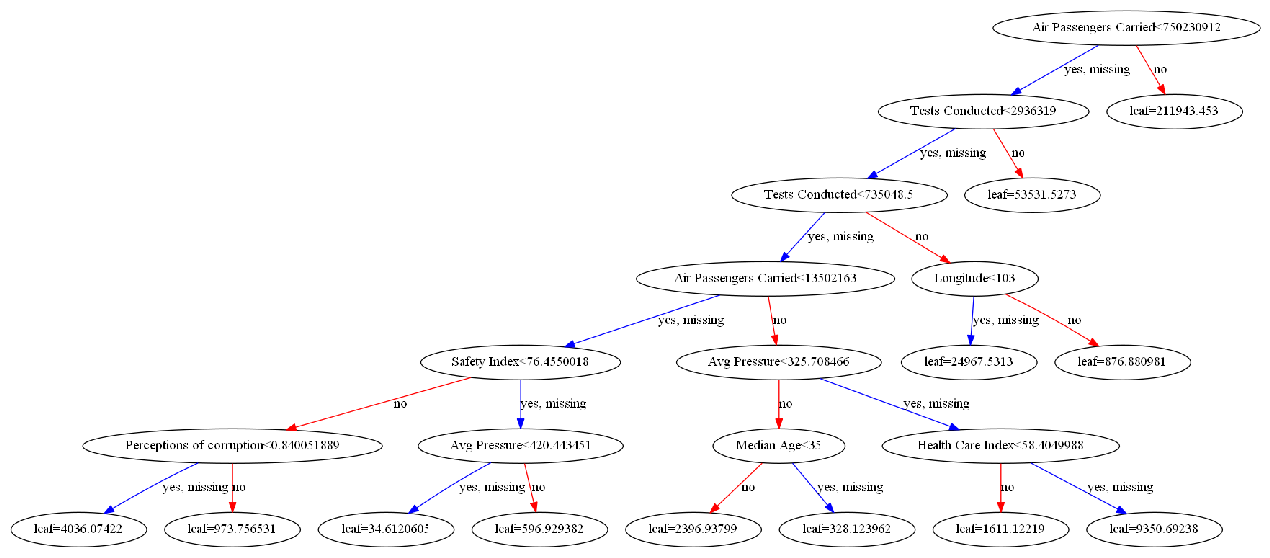

In [16]:
#visualize decision trees

xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()